In [6]:
import pandas as pd
import os
os.getcwd()

'/Users/ranjeetapegu/Documents/python/dataset'

In [7]:
Movies = pd.read_csv("Movie-Ratings.csv")

In [8]:
len(Movies)
Movies.columns=["Film","Genre","CriticRating","AudienceRating","BudgetMillions","Year"]
Movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


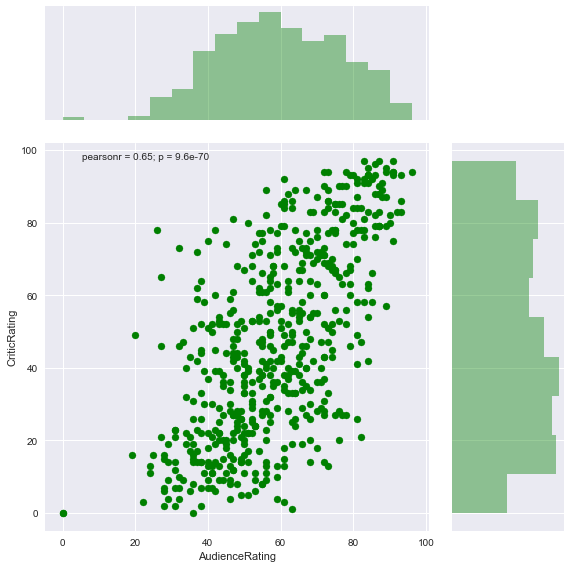

In [11]:
# JOINPLOTS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

j = sns.jointplot(data=Movies, x = 'AudienceRating', y = 'CriticRating',
                  kind='scatter',size =8, color="g", ratio=3)

In [9]:
# Categorical Variables**
Movies.Year = Movies.Year.astype('category')
Movies.Genre = Movies.Genre.astype('category')
Movies.Film = Movies.Film.astype('category')
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


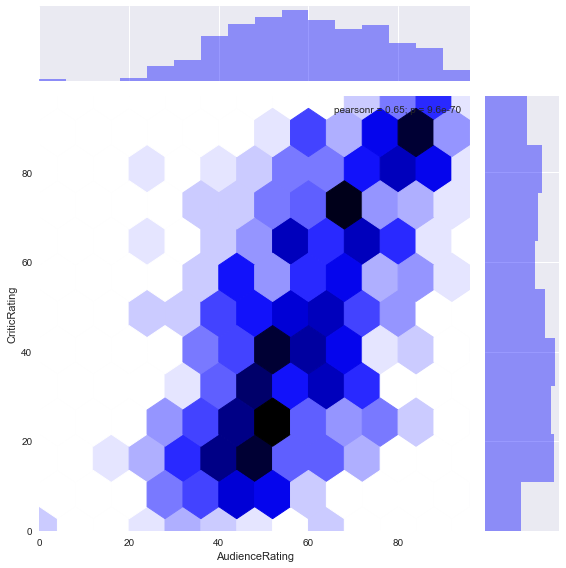

In [15]:
j = sns.jointplot(data=Movies, x = 'AudienceRating', y = 'CriticRating',
                  kind='hex',size =8, color="b", ratio=5)

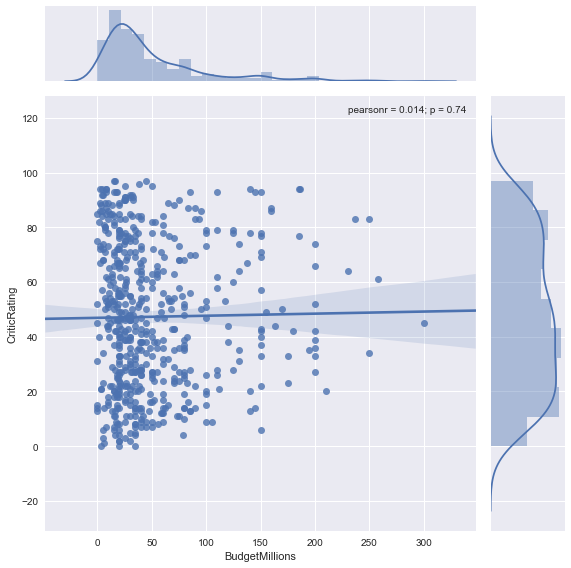

In [16]:
j1 = sns.jointplot(data=Movies, x= 'BudgetMillions',
                   y = 'CriticRating', kind ='reg', size =8)

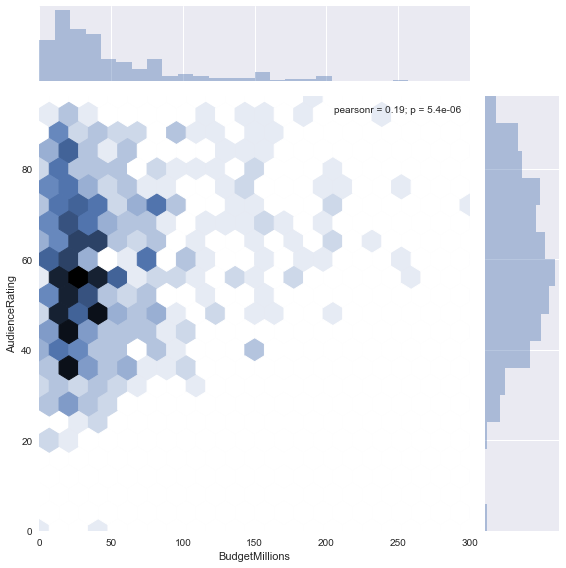

In [38]:
j1 = sns.jointplot(data=Movies, x= 'BudgetMillions', 
                   y = 'AudienceRating', kind ='hex', size =8)

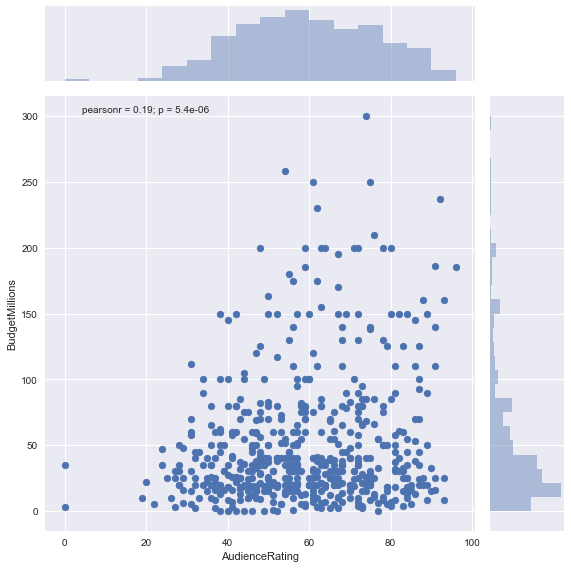

In [44]:
j1 = sns.jointplot(data=Movies, x= 'AudienceRating',
                   y = 'BudgetMillions', kind ='scatter', size =8)

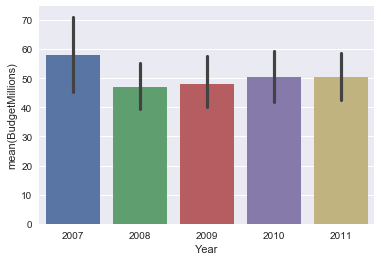

In [12]:
j1 = sns.barplot(data=Movies, x= 'Year', y = 'BudgetMillions')

-----


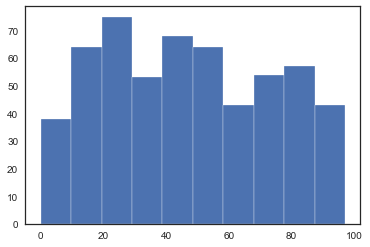

In [22]:
sns.set_style('white')
p = plt.hist(Movies.CriticRating, bins=10,histtype='bar', ec='white')

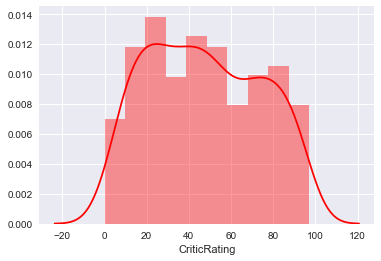

In [19]:
sns.distplot(Movies.CriticRating, color = 'Red', bins = 10)

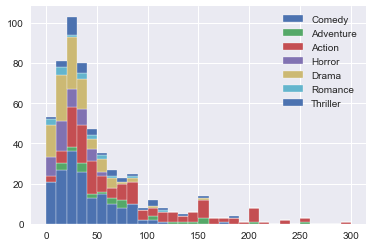

In [41]:

A=[]
Mylegend =[]
for i in Movies.Genre.unique():
    Mylegend.append(i)
    A.append(Movies[Movies.Genre ==  i].BudgetMillions)
    
plt.hist(A,bins=30,histtype='bar',rwidth=1, stacked=True, ec='white',label =Mylegend)
plt.legend()
plt.show()



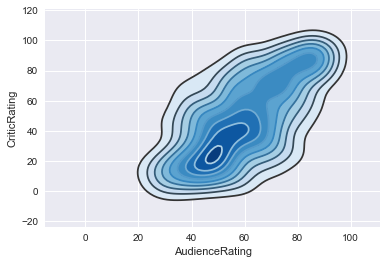

In [52]:
#kdeplot(kernel density plot)

sns.kdeplot(Movies.AudienceRating,Movies.CriticRating,shade=True,
            cmap="Blues",shade_lowest=False)
sns.kdeplot(Movies.AudienceRating,Movies.CriticRating,
            cmap="Blues_d")

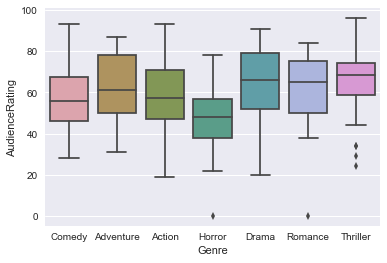

In [59]:
sns.boxplot( Movies.Genre,Movies.AudienceRating,saturation=0.5)


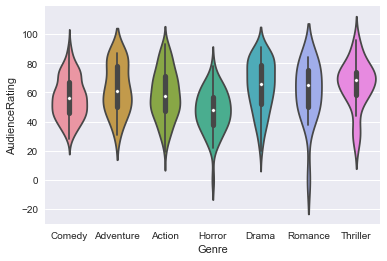

In [58]:
sns.violinplot(Movies.Genre, Movies.AudienceRating)

# SUBPLOTS 




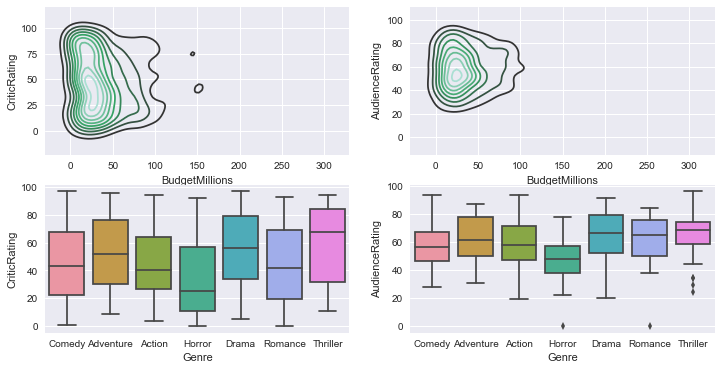

In [113]:
f.set_figheight(12)
f.set_figwidth(6)
f, ax = plt.subplots(2,2,figsize=(12,6))
k1= sns.kdeplot(Movies.BudgetMillions, Movies.CriticRating, ax=ax[0,0])
k2= sns.kdeplot(Movies.BudgetMillions,Movies.AudienceRating, ax = ax[0,1])
k3= sns.boxplot(Movies.Genre, Movies.CriticRating, ax=ax[1,0])
k4= sns.boxplot(Movies.Genre,Movies.AudienceRating, ax = ax[1,1])


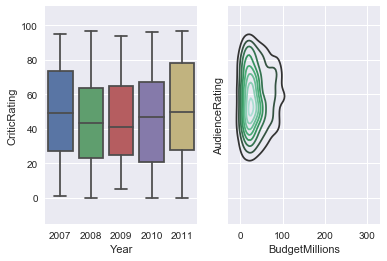

In [156]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
k11= sns.boxplot(Movies.Year, Movies.CriticRating,ax=ax1)
k21= sns.kdeplot(Movies.BudgetMillions,Movies.AudienceRating,ax=ax2)

----------------Facet Grid-----------
    

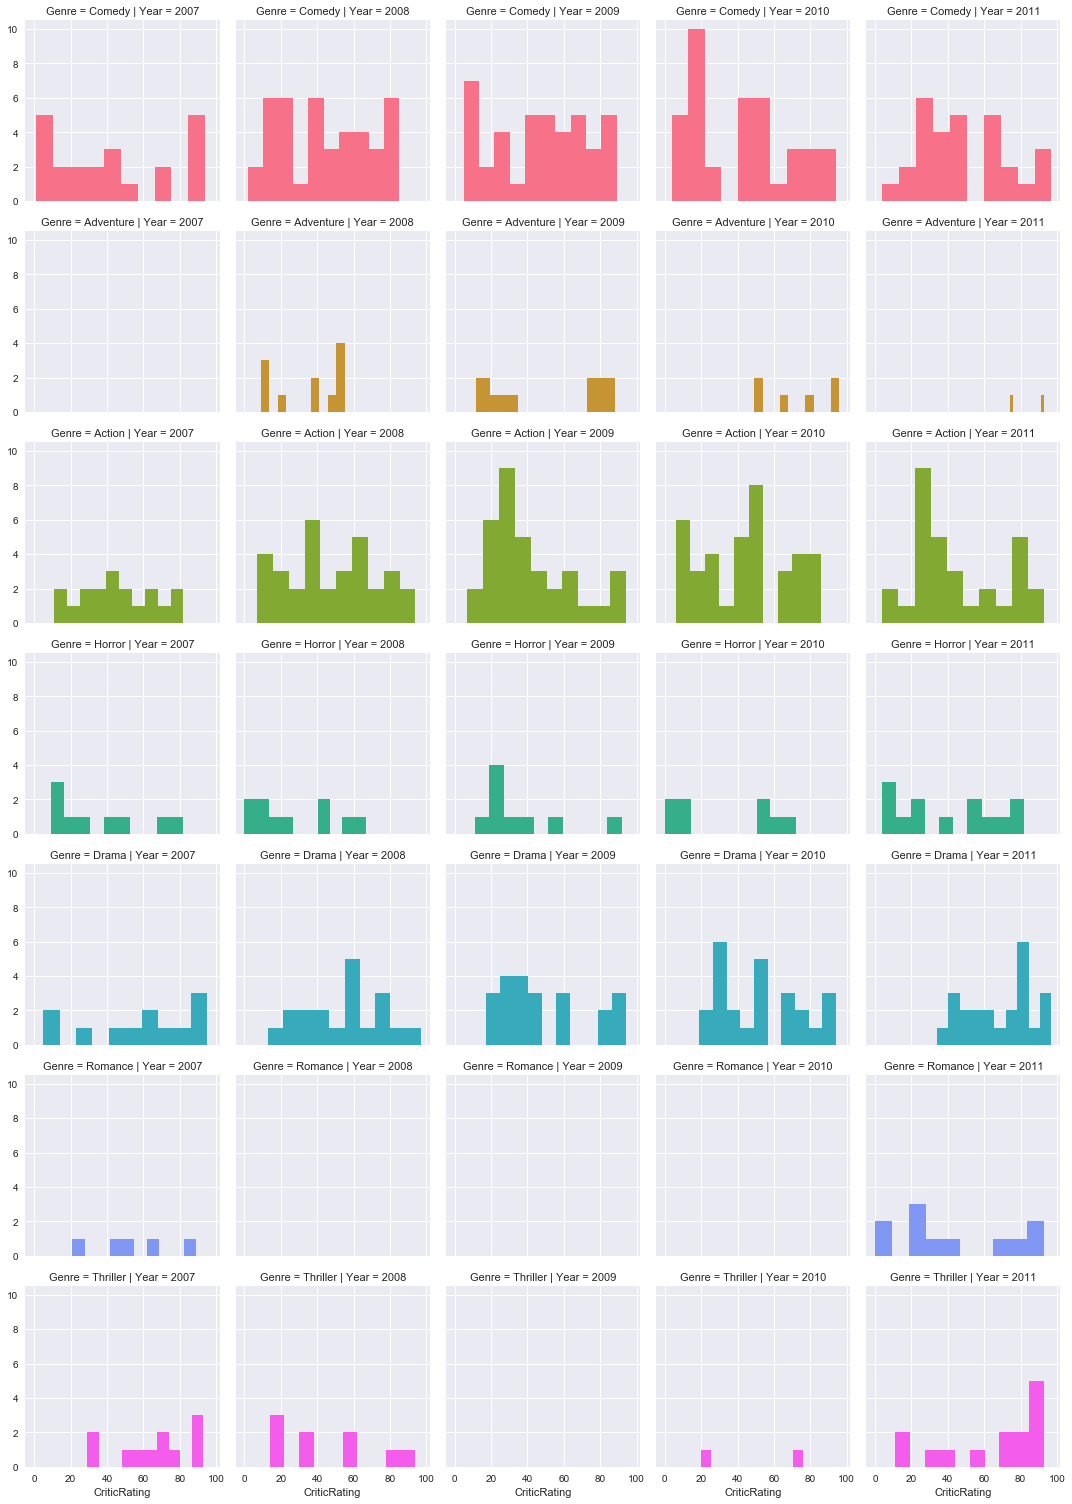

In [170]:
g1  = sns.FacetGrid(Movies, row='Genre', col ='Year',hue='Genre')
kws =dict(s =50,linewidth=0.5)
g1 = g1.map(plt.hist, 'CriticRating')


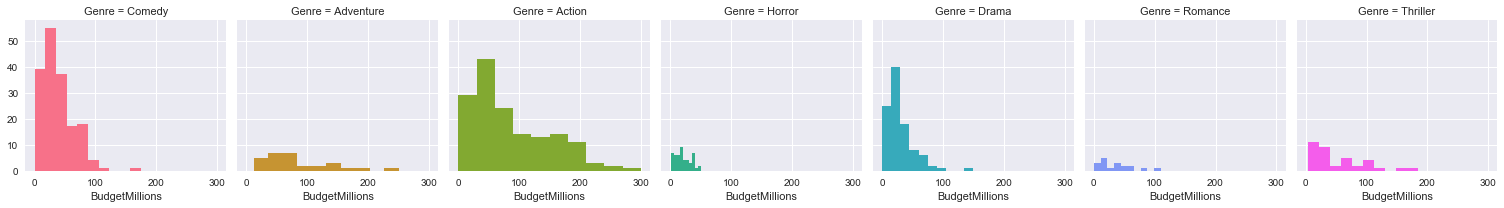

In [179]:
g1  = sns.FacetGrid(Movies, col='Genre',hue='Genre')
#kws =dict(s =50,linewidth=0.5)
g1 = g1.map(plt.hist, 'BudgetMillions')

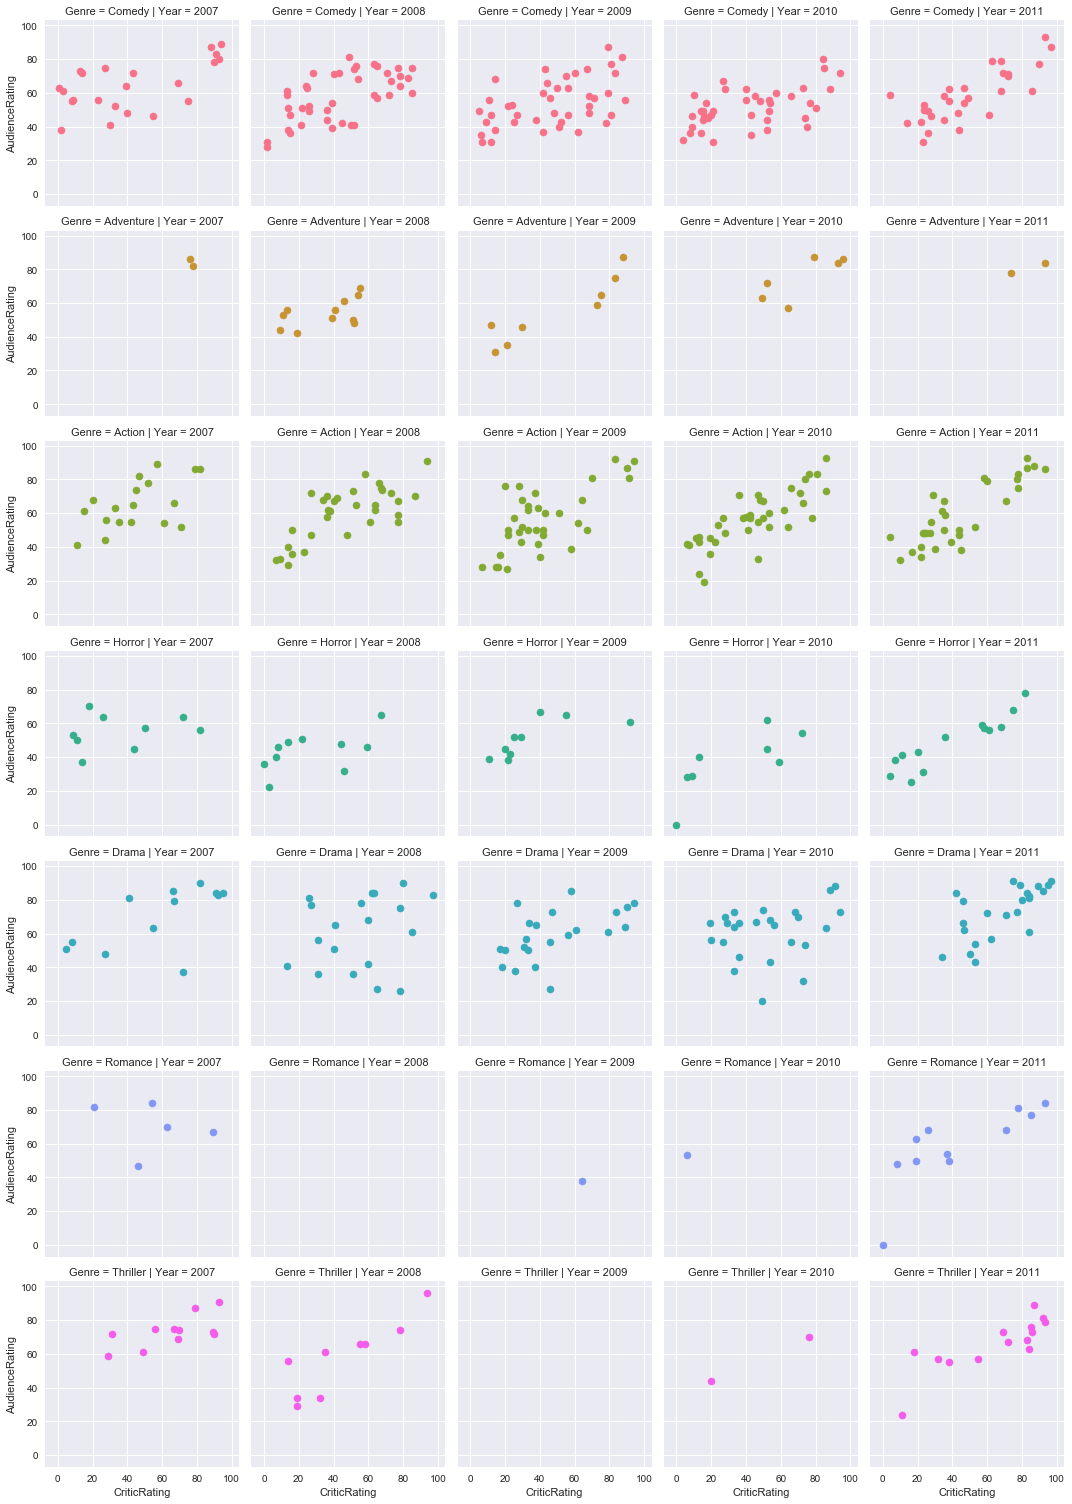

In [168]:
g1  = sns.FacetGrid(Movies, row='Genre', col ='Year',hue='Genre')
g1  = sns.FacetGrid(Movies, row='Genre', col ='Year',hue='Genre')
kws =dict(s =50,linewidth=0.5)
g1 = g1.map(plt.scatter, 'CriticRating','AudienceRating',**kws)kws =dict(s =50,linewidth=0.5)
g1 = g1.map(plt.scatter, 'CriticRating','AudienceRating',**kws)


# Coordinates amd DIagonals

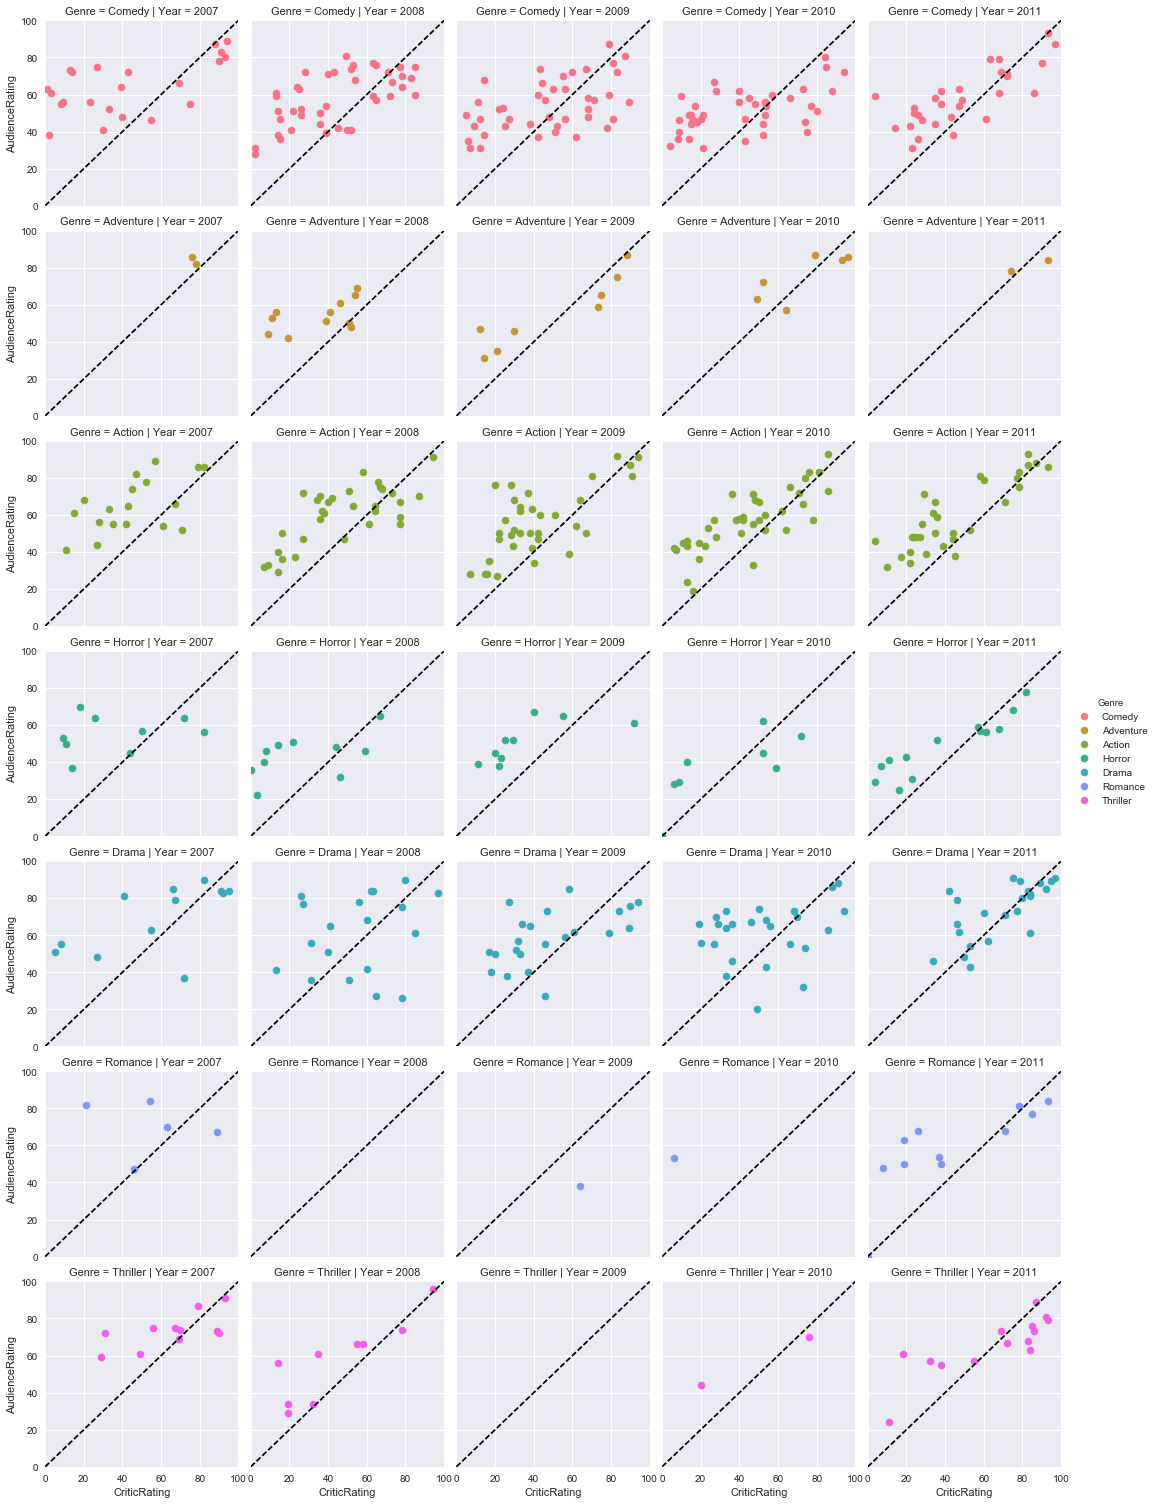

In [187]:
g1  = sns.FacetGrid(Movies, row='Genre', col ='Year',hue='Genre')
kws =dict(s =50,linewidth=0.5)
g1 = g1.map(plt.scatter, 'CriticRating','AudienceRating',**kws)
g1.set(xlim =(0,100),ylim=(0,100))
for ax in g1.axes.flat:
    ax.plot((0,100),(0,100),c='black', ls ='--')
g1.add_legend()